<a href="https://colab.research.google.com/github/ashutoshvermacse/Classification/blob/main/Classification(Dry_Bean_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import libraries**

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score




### **Load the 'Dry Bean' dataset**

In [49]:
# Load the Dry Bean dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

# Read the Excel file from the ZIP archive
with ZipFile(BytesIO(requests.get(url).content)) as z:
    with z.open('DryBeanDataset/Dry_Bean_Dataset.xlsx') as f:
        beans = pd.read_excel(f)

### **Observe the data**

In [50]:
beans.info()
beans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### **Exploratory data analysis and visualization**

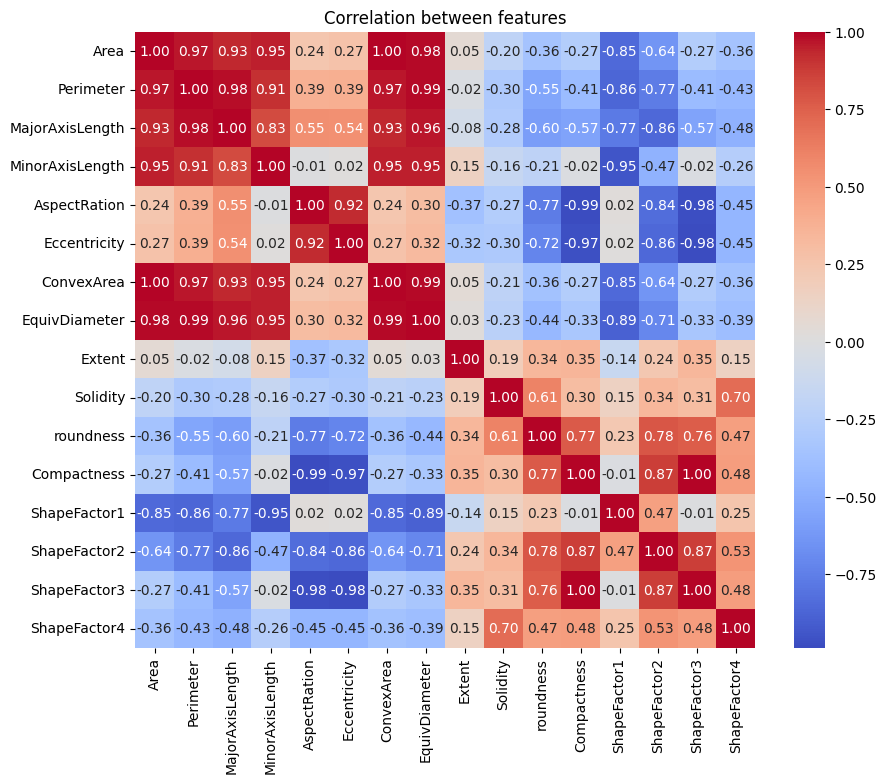

In [51]:
correlation_matrix = beans.iloc[:, :16].corr()

# Display correlation matrix of features as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between features')
plt.show()


Distribution of features:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   


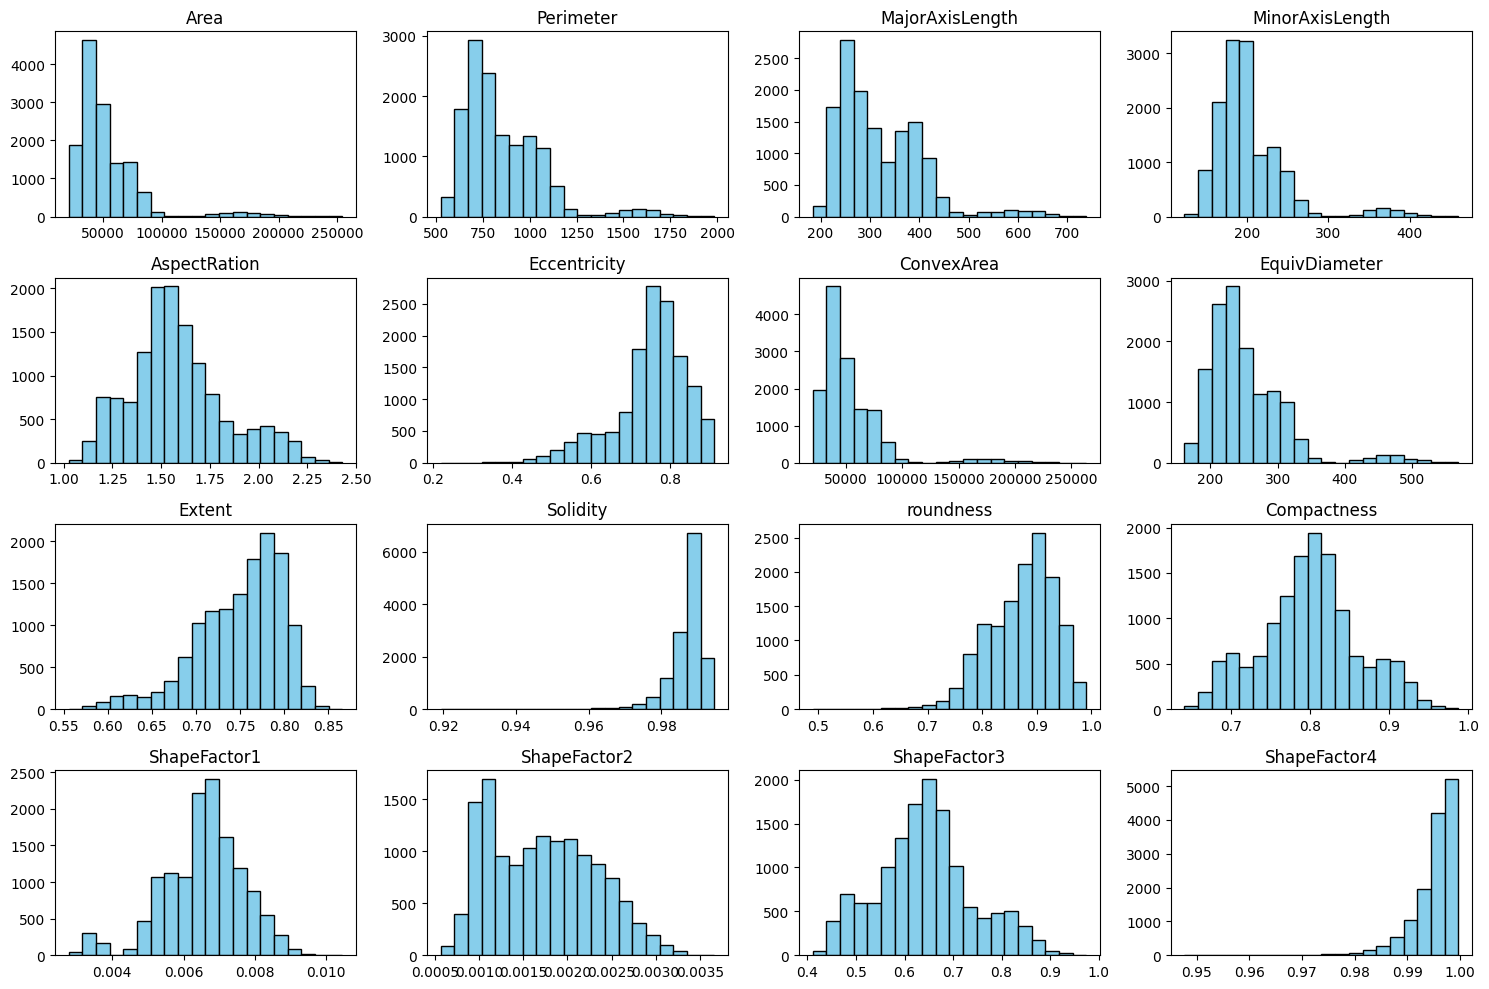

In [52]:
# Explore distribution of features
print("\nDistribution of features:")
print(beans.describe())

# Plot distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(beans.columns[:-1]):
    plt.subplot(4, 4, i+1)
    plt.hist(beans[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
plt.tight_layout()
plt.show()

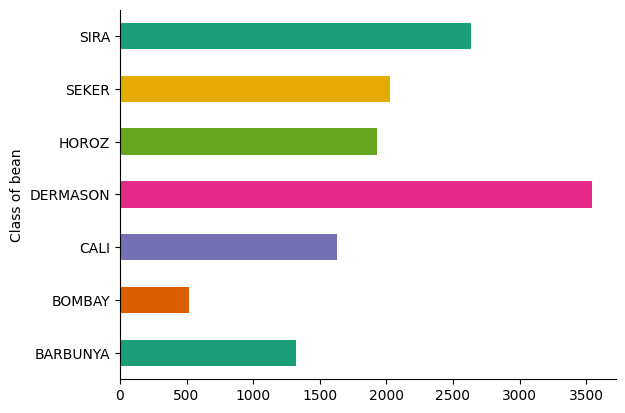

In [53]:
# Plot distribution of classes
beans.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.ylabel('Class of bean')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Replace missing values and split the data**

In [54]:
# Replace missing values with mean
imputer = SimpleImputer(strategy='mean')
beans_imputed = pd.DataFrame(imputer.fit_transform(beans.iloc[:, :16]), columns=beans.columns[:16])

# Split the dataset
X = beans_imputed
y = beans['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

### **Build models**

In [63]:
models = {
    "Multinomial Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=10000),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(),
    "Neural Network": make_pipeline(StandardScaler(),MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=10000, random_state=42)),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
print("\nAccuracy of models on test data:")
results_df = pd.DataFrame(results.items(), columns=['Method Used', 'Accuracy'])
display(results_df.sort_values(by='Accuracy', ascending=False))


Accuracy of models on test data:


,Method Used,Accuracy
5,Neural Network,0.918450
3,XGBoost,0.917256
2,Random Forest,0.916980
0,Multinomial Logistic Regression,0.911287
1,Decision Trees,0.887226
7,Naive Bayes,0.762513
6,k-NN,0.642300
4,SVM,0.630269
